DBSCAN stands for __Density-based spatial clustering of applications with noise__. It is a density based clustering algorithm. Given a set of points, it groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. 

DBSCAN takes 2 parameters - __epsilon__ and __minPts__

- Given a point p, epsilon defines the radius upto which the neighbouring points of p can form cluster 
- minPts defines the minimum number of points required to form cluster

__Outline of the algorithm__:

- For each point _p_ in dataset, check whether it is visited (or considered) or not. If not, then mark it as visited. 
- We will be using the following labels:
  - 0 -- not visited
  - -1 -- outlier 
  - Numbers other than the above two denote the cluster numbers of the points
- Then, we will search for points in the neighbourhood of _p_ in consideration using a function __search_neighbour__. 
- If the number of points in the neighbourhood(decided by __epsilon__) greater than or equal to the __minPts__, then we will consider _p_ as a __core point__ and recursively explore it.
- Else, we will label it as __outlier__ or __noise__.
- The above steps are achieved using a __fit__ function of our program.
- The exploration of core points is done by a __explore__ function.
  - Inside the function, we will label the __core point__ with a new cluster label.
  - For each point in the neighbourhood of the __core point__, we will check if the point is an outlier. If yes, we will include it in the cluster assigned to the __core point__.
  - Then we will further check if the point is unvisited. If yes, we will include it in the cluster, and then, we will search for the neighbouring points of that point using the __search_neighbour__ function.
  - If it satisfies the condition for __core point__ we will include its neighbour with the neighbour of the initial __core point__ in consideration. 
  - This goes recursively, from one point to another until it visits all the point, i.e. all the labels turns non-zero.
- The __search_neighbour__ function consider a point and calculate the distances of all the other points from that point and if the distance is less than epsilon, then, it appends it in a list. That list serves us the list containing the neighbourhood points. Since it acts on __FIFO__ principle, we will call it __queue__ in our program. 

__DBSCAN vs KMeans__:

While both are clustering algorithms, they are different in following ways:
- Unlike KMeans, DBSCAN doesn't require the number of clusters to be pre-defined.
- DBSCAN requires careful selection of its parameters (epsilon and minPts).
- KMeans is faster than DBSCAN. 
- DBSCAN perform poorly with clusters of different densities. 

In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import random
%matplotlib inline

In [2]:
class DBSCAN:
    def __init__(self, data, epsilon, min_pts):
        self.data = data
        self.epsilon = epsilon
        self.min_pts = min_pts
        
        #used in plotting
        self.col_dict = {-1:'black', 1:'blue', 2:'green', 3:'yellow', 
                         4:'pink', 5:'red'}
        
    def fit(self):
        #contains datapoints with corresponding labels
        #initially points are labelled '0', i.e. not visited
        label_dict = {}
        for point in self.data:
            label_dict[tuple(point)] = 0

        #keep track of the centroid number
        label_counter = 0
    
        for point in label_dict.keys():
            #if a point is visited, then we continue with it 
            if label_dict[tuple(point)] != 0:
                continue
            
            #stores the points in the epsilon radius from the point in consideration
            queue = self.search_neighbour(point)
            if len(queue)<self.min_pts:
                #if the no. of points in neighbourhood is less than minPts,
                #the point is labelled as outlier or noise
                label_dict[tuple(point)] = -1
            else:
                #if the neighbourhood has sufficient points, the point is explored
                #further
                label_counter += 1
                self.explore(label_dict, point, queue, label_counter)
            
        return label_dict
    
    def explore(self, label_dict, point, queue, label_counter):
        
        #the point is assigned a new centroid
        label_dict[tuple(point)] = label_counter
    
        #the points in the neighbourhood of the points are checked. If they are noise,
        #we include them in the new centroid. And if they are unvisited, we do the same.
        #Moreover, the neighbourhood of the point is searched, and if the no. of points
        #in its neighbourhood is greater than minPts, it's neighbouring points are added 
        #to the queue.

        for p in queue:
            if label_dict[tuple(p)] == -1:
                label_dict[tuple(p)] = label_counter
        
            elif label_dict[tuple(p)] == 0:
                label_dict[tuple(p)] = label_counter
                new_queue = self.search_neighbour(p)
            
                if len(new_queue) >= self.min_pts:
                    queue += new_queue
                    
    def search_neighbour(self, p):
        #temp stores the points within epsilon distance from point p
        temp = []
        for point in self.data:
            dist = np.linalg.norm(point - p)
            if dist < self.epsilon:
                temp.append(point)
            
        return temp 
    
    def show(self):
        
        l_dict = self.fit()
        l_list = []
        
        #l_list stores the labels of the datapoints obtained after performing the 
        #algorithm. This list will be used for plotting purpose
        for label in l_dict.values():
            l_list.append(label)
            
        plt.title('DBSCAN Clustering Algorithm')
        plt.xlabel('Feature 0')
        plt.ylabel('Feature 1')
        
        for i in range(len(l_list)):
            plt.scatter(x[i][0], x[i][1], color=self.col_dict[l_list[i]])
            
        plt.show()
            
        
        

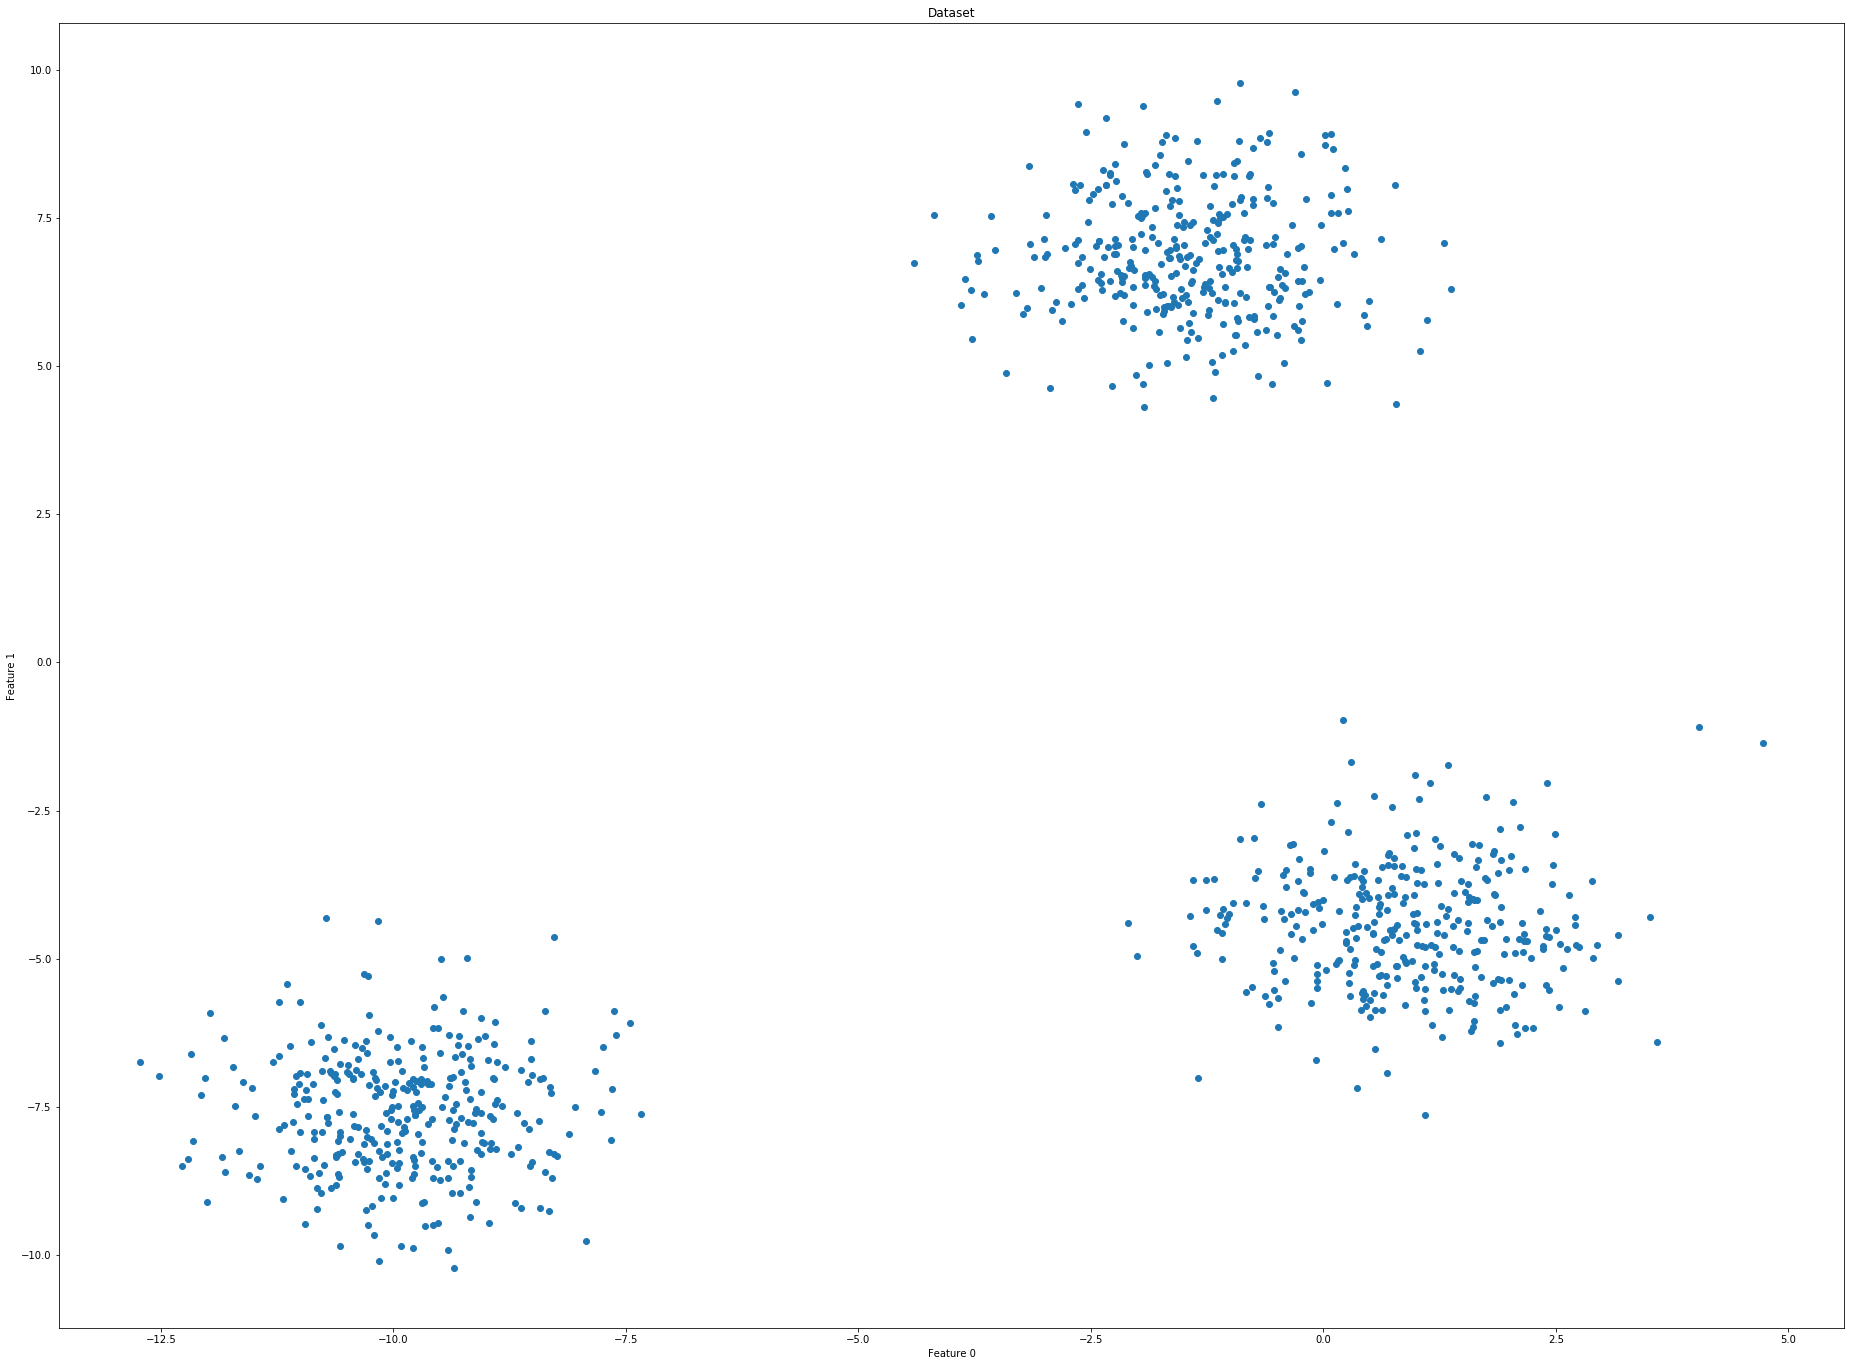

In [3]:
np.random.seed(100)
x, y = make_blobs(n_samples=1000, centers=3)
fig = plt.figure(figsize = (32, 24))
plt.title('Dataset')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.scatter(x[:,0], x[:,1])
plt.show()

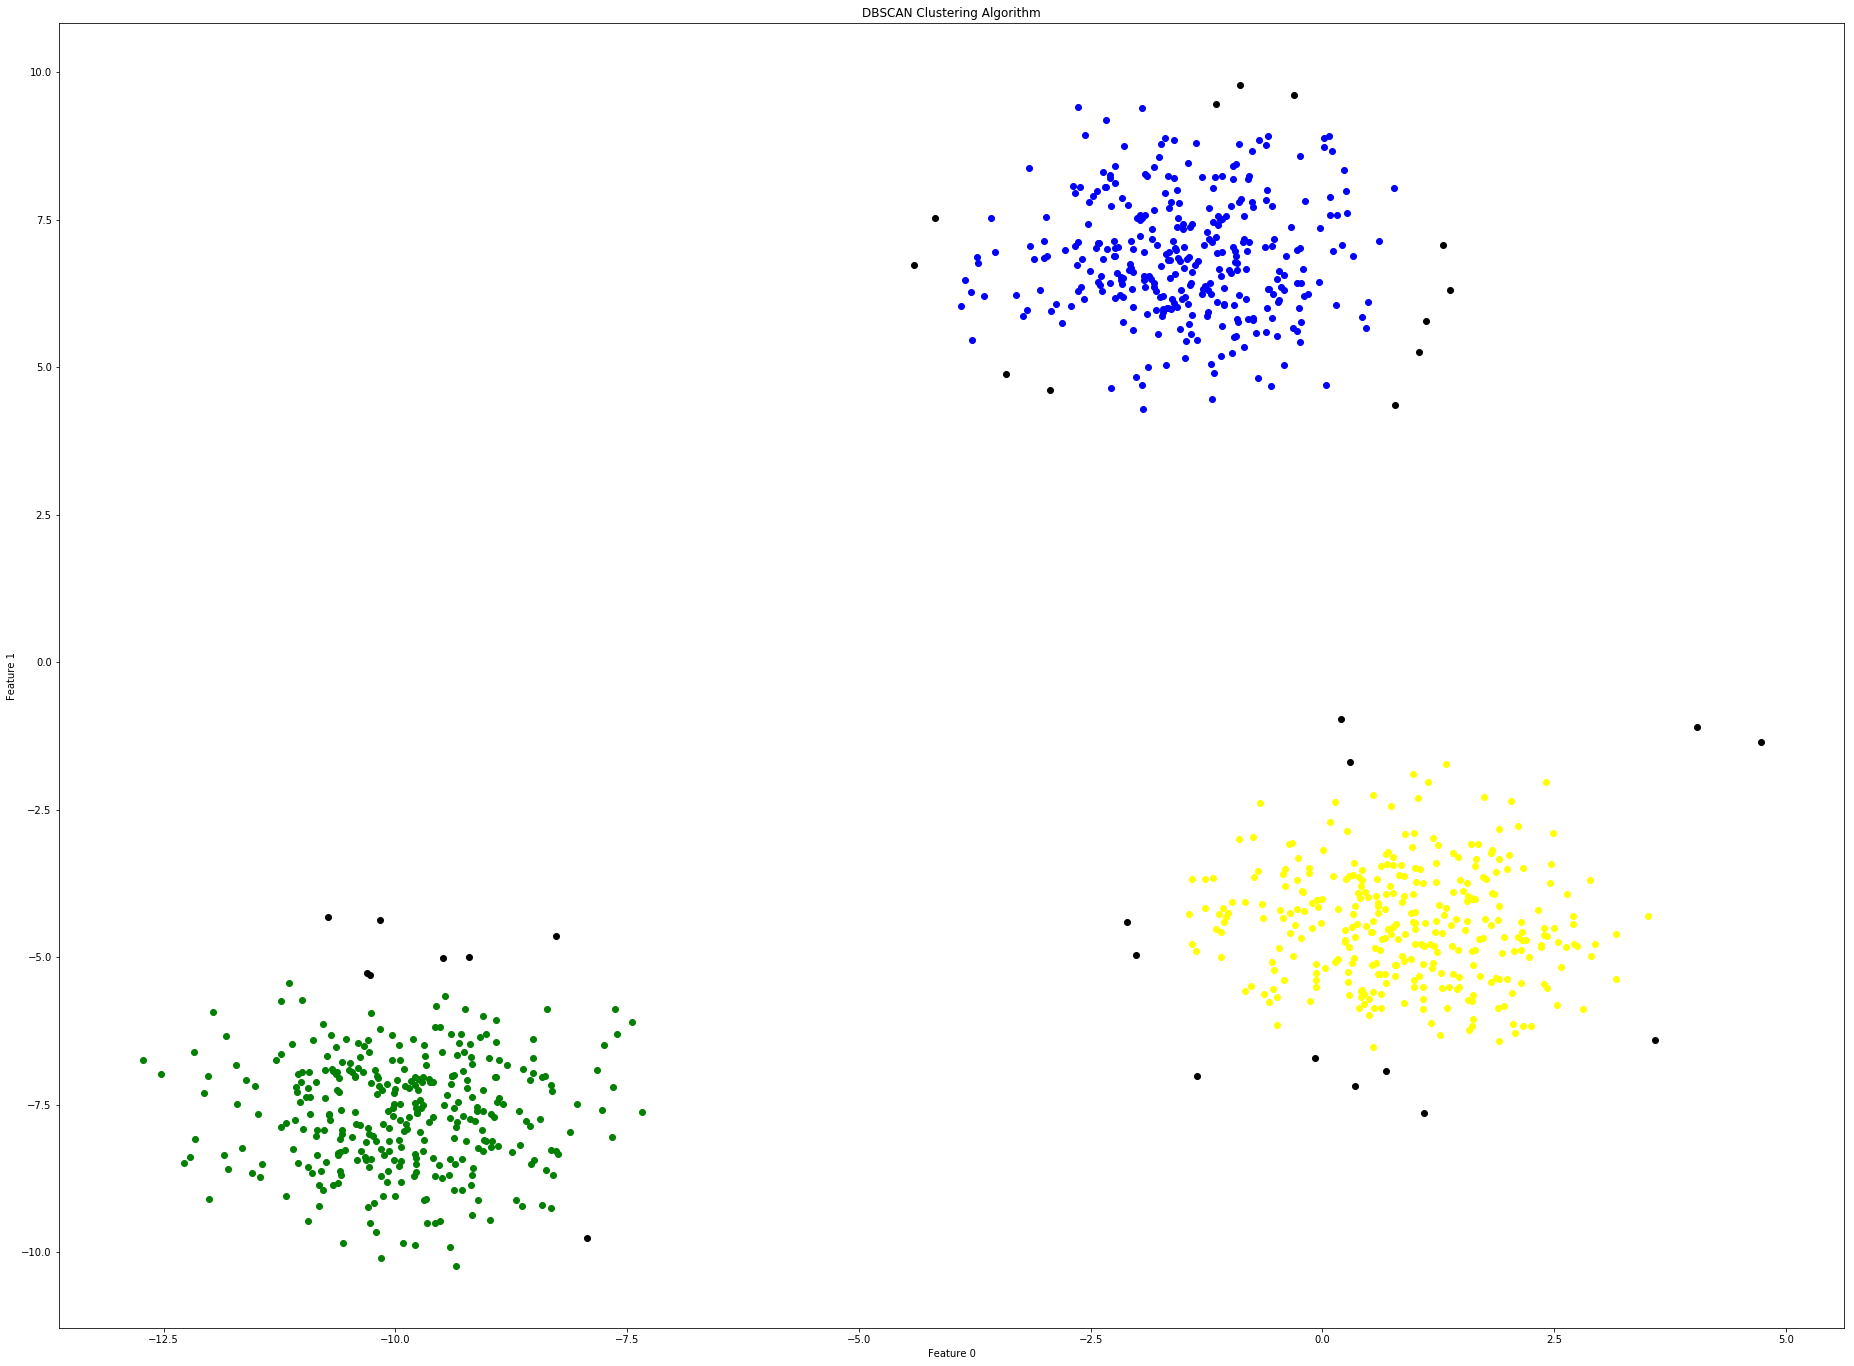

In [4]:
db = DBSCAN(x, epsilon=0.6, min_pts=4)
fig = plt.figure(figsize = (32, 24))
db.show()